In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [3]:
data = []
paths = []
result = []

for r, d, f in os.walk('../brain_tumor/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [4]:
paths = []
for r, d, f in os.walk('../brain_tumor/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [11]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)       

In [12]:
y_train.shape

(111, 2)

In [13]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 3s 816ms/step - loss: 35.3604 - accuracy: 0.6036 - val_loss: 28.7455 - val_accuracy: 0.7143
Epoch 2/30
3/3 [==============================] - 2s 783ms/step - loss: 20.3772 - accuracy: 0.6216 - val_loss: 40.6443 - val_accuracy: 0.5357
Epoch 3/30
3/3 [==============================] - 2s 736ms/step - loss: 12.6037 - accuracy: 0.6937 - val_loss: 16.9375 - val_accuracy: 0.6429
Epoch 4/30
3/3 [==============================] - 2s 752ms/step - loss: 4.0388 - accuracy: 0.7928 - val_loss: 6.3253 - val_accuracy: 0.6786
Epoch 5/30
3/3 [==============================] - 2s 767ms/step - loss: 3.3867 - accuracy: 0.8018 - val_loss: 3.1675 - val_accuracy: 0.7143
Epoch 6/30
3/3 [==============================] - 2s 726ms/step - loss: 2.0326 - accuracy: 0.8829 - val_loss: 8.3841 - val_accuracy: 0.7500
Epoch 7/30
3/3 [==============================] - 2s 755ms/step - loss: 2.5654 - accuracy: 0.8919 - val_loss: 11.1252 - val_accuracy: 0.6786
Epoch 8/30
3/

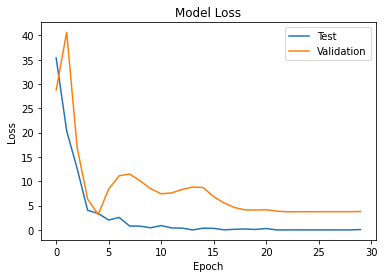

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [2]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

In [31]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 088D-275C

 Directory of c:\Users\Berk\Desktop\brain_tumor

20.04.2022  18:19    <DIR>          .
20.04.2022  18:19    <DIR>          ..
20.04.2022  18:19                 0 brain.ipynb
15.03.2022  13:53    <DIR>          brain_tumor_dataset
15.03.2022  13:53    <DIR>          no
15.03.2022  13:53    <DIR>          yes
               1 File(s)              0 bytes
               5 Dir(s)  274.092.769.280 bytes free


100.0% Confidence This Is No, Its not a tumor


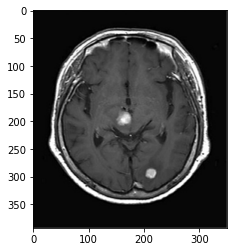

In [16]:
from matplotlib.pyplot import imshow
img = Image.open("no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [4]:
from keras.models import load_model

In [5]:
loaded_model=load_model("brain_model.h5")

100.0% Confidence This Is No, Its not a tumor


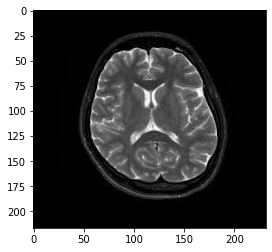

In [22]:
from matplotlib.pyplot import imshow
img2=Image.open("no/No 2.jpg")
new=np.array(img2.resize((128,128)))
new=new.reshape(1,128,128,3)
newres=loaded_model.predict_on_batch(new)
newclassification=np.where(newres==np.max(newres))[1][0]
ab=imshow(img2)
print(str(newres[0][newclassification]*100) + '% Confidence This Is ' + names(newclassification))

In [19]:
newclassification

0